## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Desktop\\DataSets\\Mall_Customers.csv")

In [3]:
df.shape

(200, 5)

In [4]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
150,151,Male,43,78,17
20,21,Male,35,24,35
89,90,Female,50,58,46
8,9,Male,64,19,3
183,184,Female,29,98,88


In [5]:
# Statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

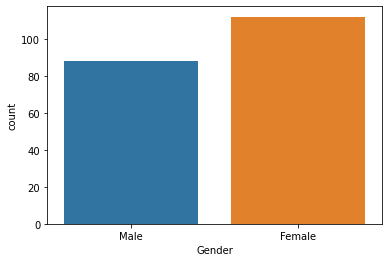

In [7]:
sns.countplot(df.Gender)

<AxesSubplot:xlabel='Age', ylabel='Density'>

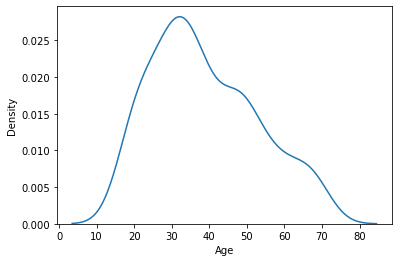

In [8]:
sns.distplot(df["Age"],hist=False)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

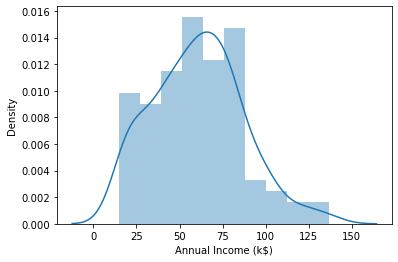

In [9]:
sns.distplot(df["Annual Income (k$)"])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

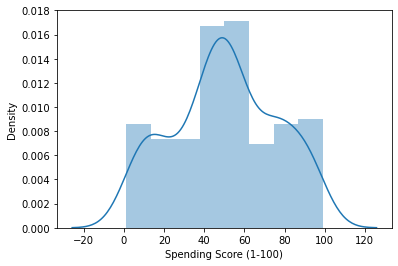

In [10]:
sns.distplot(df['Spending Score (1-100)'])

In [11]:
# Correlation matrix
corr=df.corr()

<AxesSubplot:>

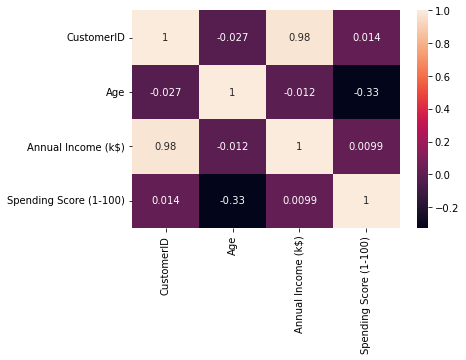

In [12]:
sns.heatmap(corr,annot=True)

## Clustering

In [13]:
# Cluster On 2 feature 

In [14]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [15]:
df1=df[["Annual Income (k$)","Spending Score (1-100)"]]
df1.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

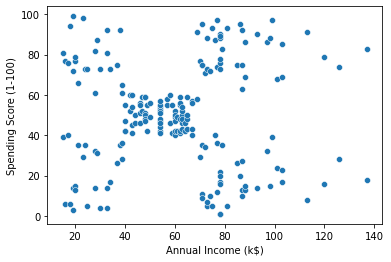

In [16]:

sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"])#,hue=df["Age"])

In [17]:
from sklearn.cluster import KMeans

In [18]:
errors=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(df1)
    errors.append(kmean.inertia_)
    

In [19]:
errors

[269981.28,
 183069.17582751293,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30241.343617936585,
 25094.432930794697,
 22209.851608025543,
 19657.783608703958]

In [20]:
# plot the result for elbow method


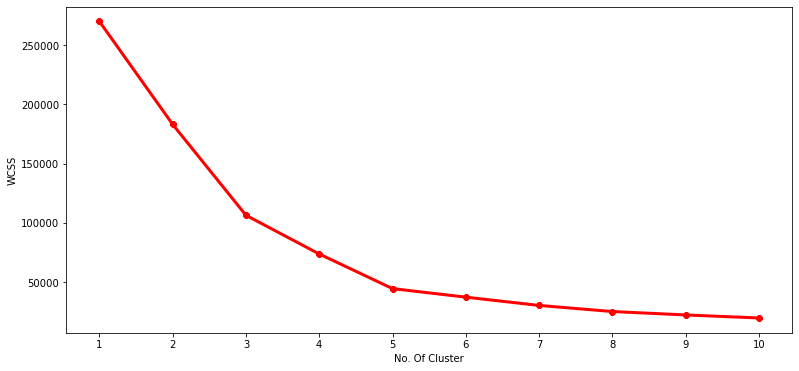

In [21]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color="red",marker='8')
plt.xlabel("No. Of Cluster")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

In [22]:
m=KMeans(n_clusters=5)
m.fit(df1)
y=m.predict(df1)
df1["Label"]=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

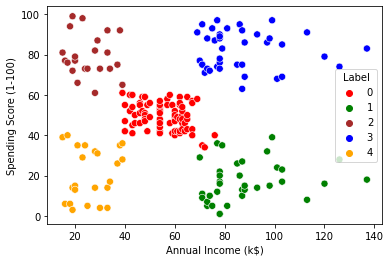

In [23]:
sns.scatterplot(data=df1,x="Annual Income (k$)",y='Spending Score (1-100)',hue='Label',s=50,palette=["red",'green','brown','blue','orange'])

In [24]:
# Cluster On 3 feature 


In [25]:
df2=df[["Annual Income (k$)","Spending Score (1-100)",'Age']]
df2.head(2)

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21


In [26]:
errors=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(df2)
    errors.append(kmean.inertia_)
    

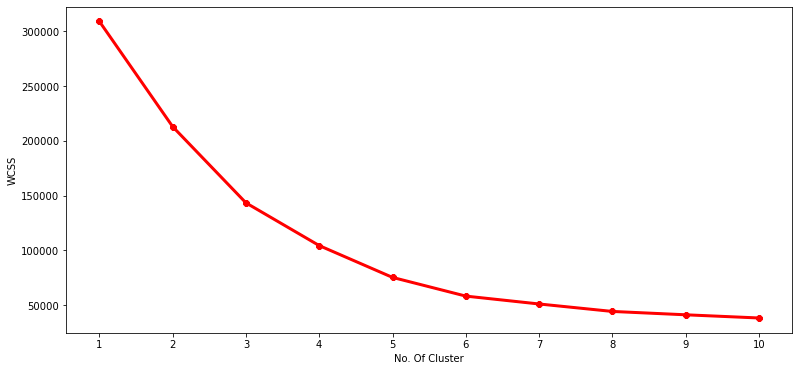

In [27]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color="red",marker='8')
plt.xlabel("No. Of Cluster")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

In [28]:
m=KMeans(n_clusters=5)
m.fit(df2)
y=m.predict(df2)
df2["Label"]=y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,0
1,15,81,21,4
2,16,6,20,0
3,16,77,23,4
4,17,40,31,0


In [30]:
#3d Scatterplot 

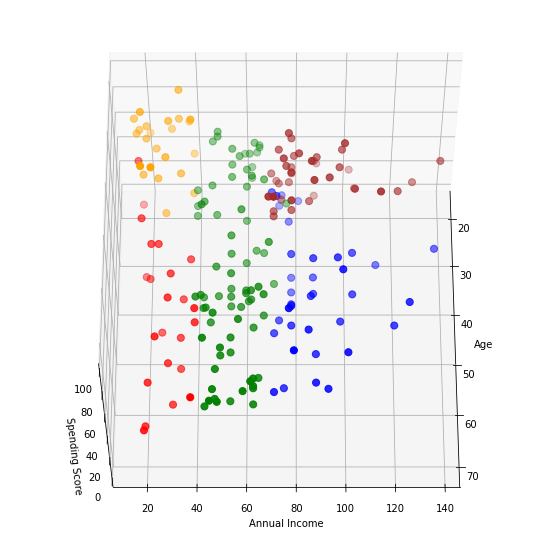

In [41]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df2['Age'][df2["Label"]==0],df2['Annual Income (k$)'][df2["Label"]==0],df2['Spending Score (1-100)'][df2["Label"]==0],c="r",s=50)
ax.scatter(df2['Age'][df2["Label"]==1],df2['Annual Income (k$)'][df2["Label"]==1],df2['Spending Score (1-100)'][df2["Label"]==1],c="g",s=50)
ax.scatter(df2['Age'][df2["Label"]==2],df2['Annual Income (k$)'][df2["Label"]==2],df2['Spending Score (1-100)'][df2["Label"]==2],c="b",s=50)
ax.scatter(df2['Age'][df2["Label"]==3],df2['Annual Income (k$)'][df2["Label"]==3],df2['Spending Score (1-100)'][df2["Label"]==3],c="brown",s=50)
ax.scatter(df2['Age'][df2["Label"]==4],df2['Annual Income (k$)'][df2["Label"]==4],df2['Spending Score (1-100)'][df2["Label"]==4],c="orange",s=50)
ax.view_init(40,180)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel("Spending Score")
plt.show()